## Calculando IBOV dolarizado com Python

### Instalando e Importando bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Definir periodo

In [2]:
# Ano - Mes - Dia
start_date = '2007-01-01'
end_date = '2023-09-18'

### Extrair e Manipular dados

In [3]:
# Obter os dados do ibov e do dolar em reais
ibov_df = yf.download('^BVSP', start=start_date, end= end_date)['Adj Close']
usd_brl_df = yf.download('USDBRL=X', start=start_date, end= end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Tranformar de Series para DateFrame
ibov_df_final = pd.DataFrame(ibov_df)
ibov_df_final.columns = ['IBOV']

usd_brl_df_final = pd.DataFrame(usd_brl_df)
usd_brl_df_final.columns = ['USDBRL']

In [6]:
# Fazendo um Merge dos DF's
ibov_dolarizado = pd.merge(ibov_df_final, usd_brl_df_final, how='inner', left_index=True, right_index=True)

In [7]:
ibov_dolarizado

,IBOV,USDBRL
Date,,
2007-01-02,45383.0,2.1310
2007-01-03,44445.0,2.1345
2007-01-04,44020.0,2.1390
2007-01-05,42245.0,2.1470
2007-01-08,42830.0,2.1465
...,...,...
2023-09-11,116883.0,4.9830
2023-09-12,117968.0,4.9294
2023-09-13,118176.0,4.9466


In [8]:
# Dividindo o ibov pelo valor do dolar
# Para obter o ibov dolarizado

ibov_dolarizado['IBOV DOLARIZADO'] = ibov_dolarizado['IBOV'] / ibov_dolarizado['USDBRL']
ibov_dolarizado

,IBOV,USDBRL,IBOV DOLARIZADO
Date,,,
2007-01-02,45383.0,2.1310,21296.573959
2007-01-03,44445.0,2.1345,20822.206345
2007-01-04,44020.0,2.1390,20579.710732
2007-01-05,42245.0,2.1470,19676.291819
2007-01-08,42830.0,2.1465,19953.411504
...,...,...,...
2023-09-11,116883.0,4.9830,23456.352529
2023-09-12,117968.0,4.9294,23931.513122
2023-09-13,118176.0,4.9466,23890.349118


### Plotar gráficos

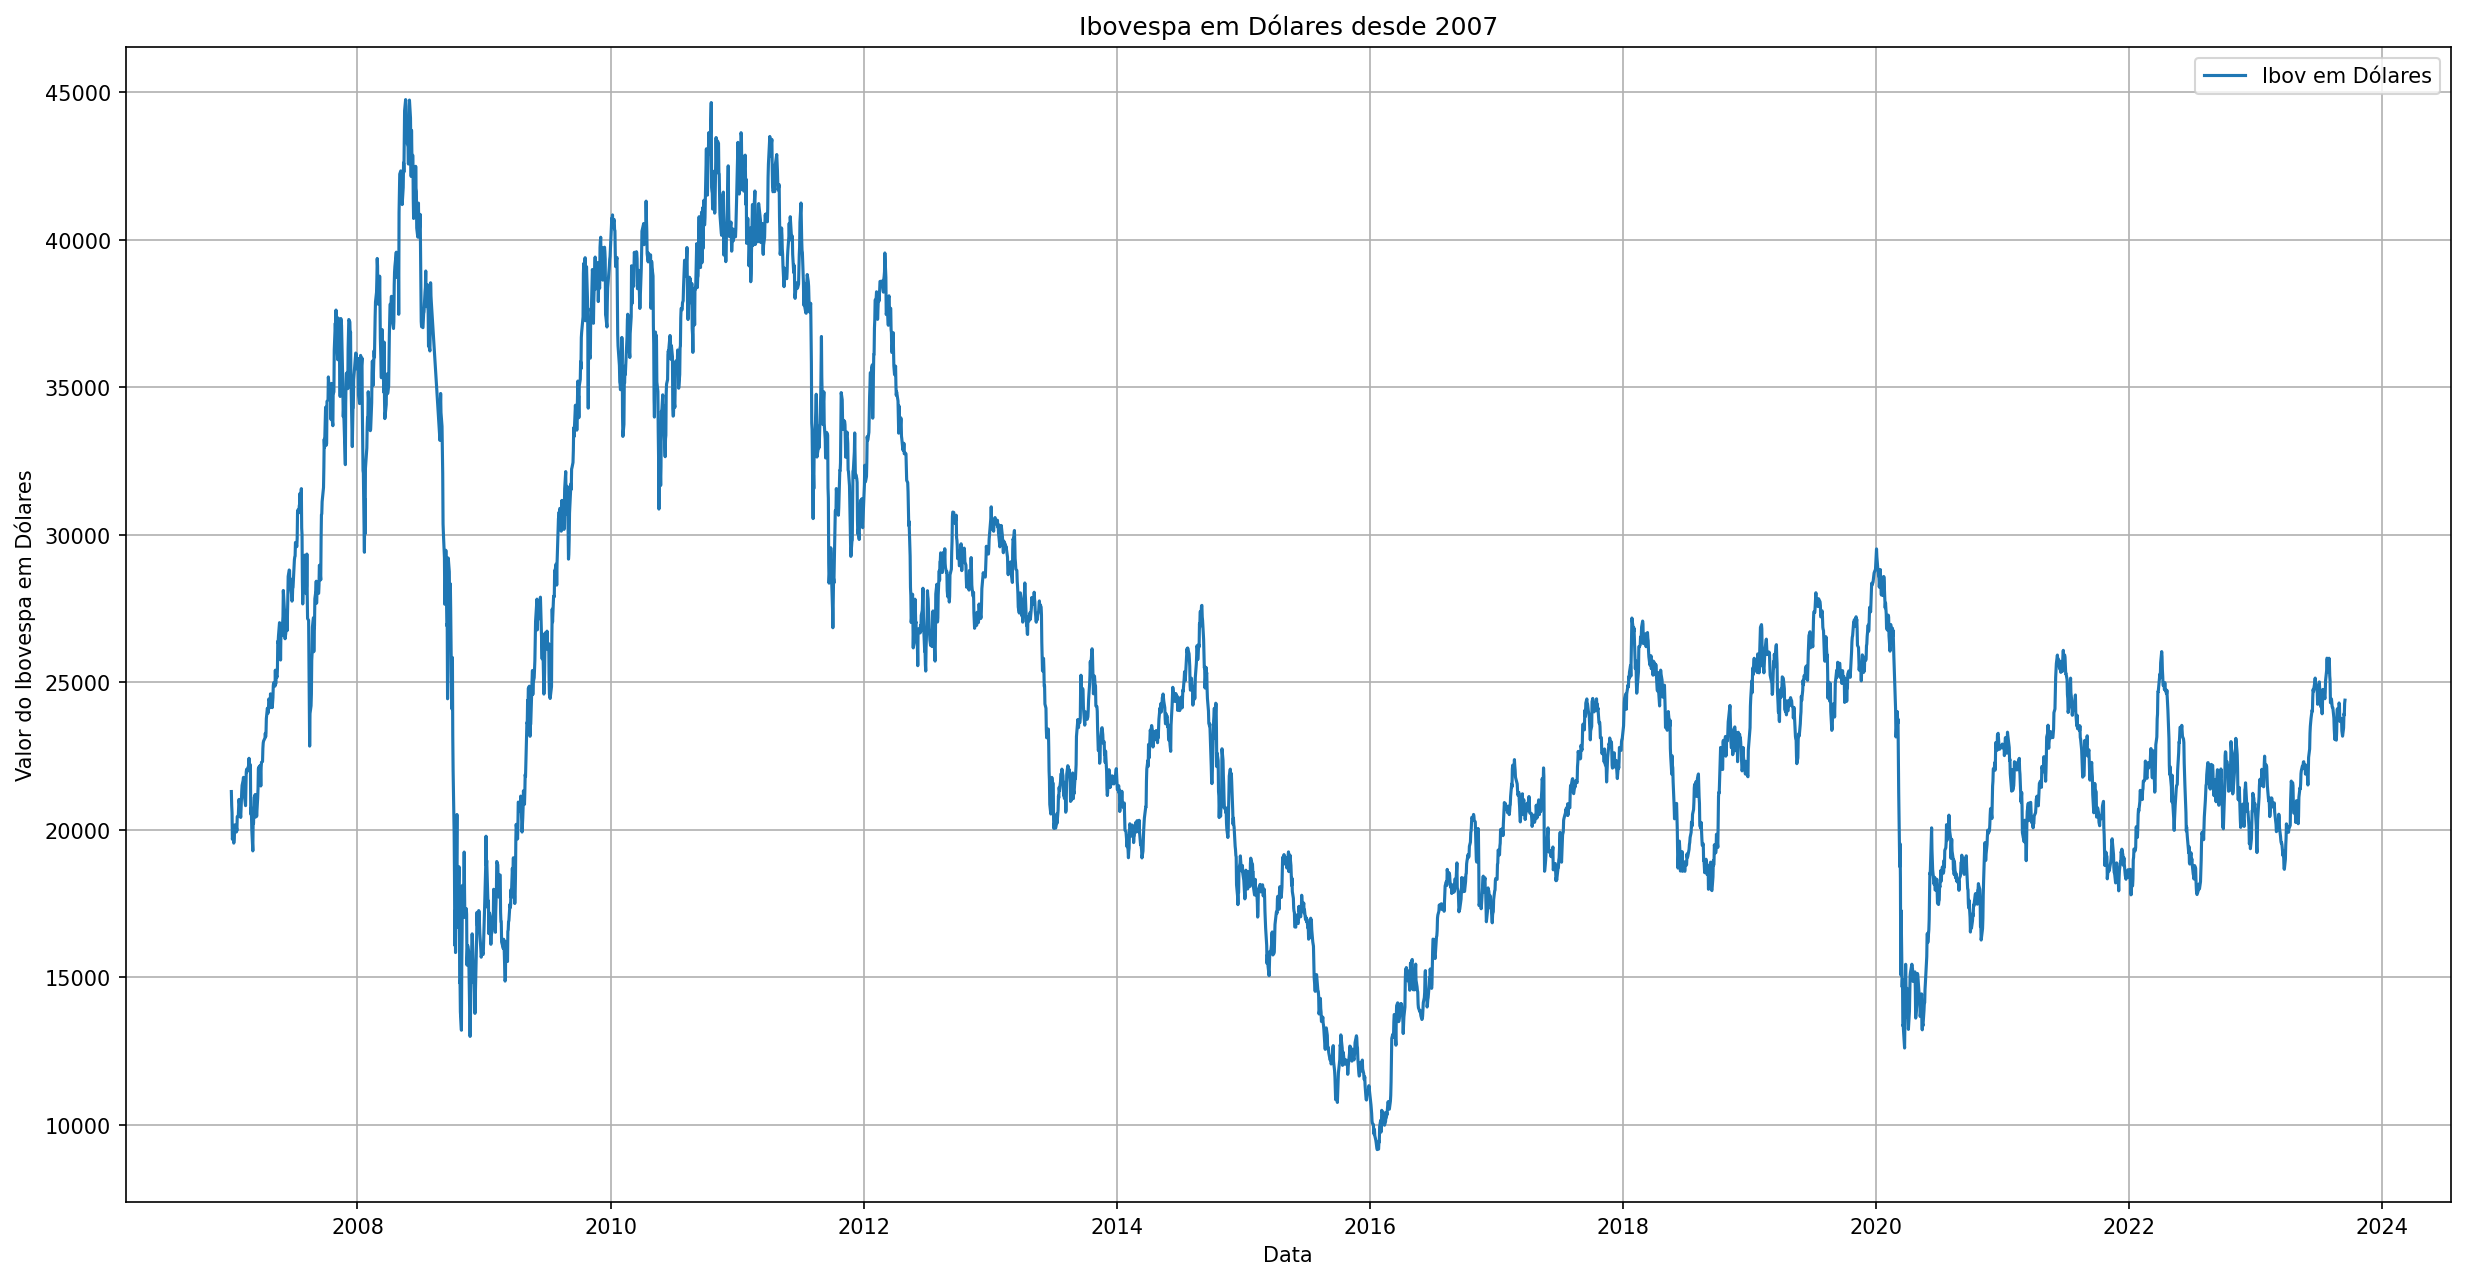

In [10]:
plt.figure(figsize=(20,10), dpi=150) # Resolução do gráfico
plt.plot(ibov_dolarizado.index, ibov_dolarizado['IBOV DOLARIZADO'], label='Ibov em Dólares')
plt.xlabel('Data')
plt.ylabel('Valor do Ibovespa em Dólares')
plt.title('Ibovespa em Dólares desde '+ start_date[:4])
plt.legend()
plt.grid()
plt.show()

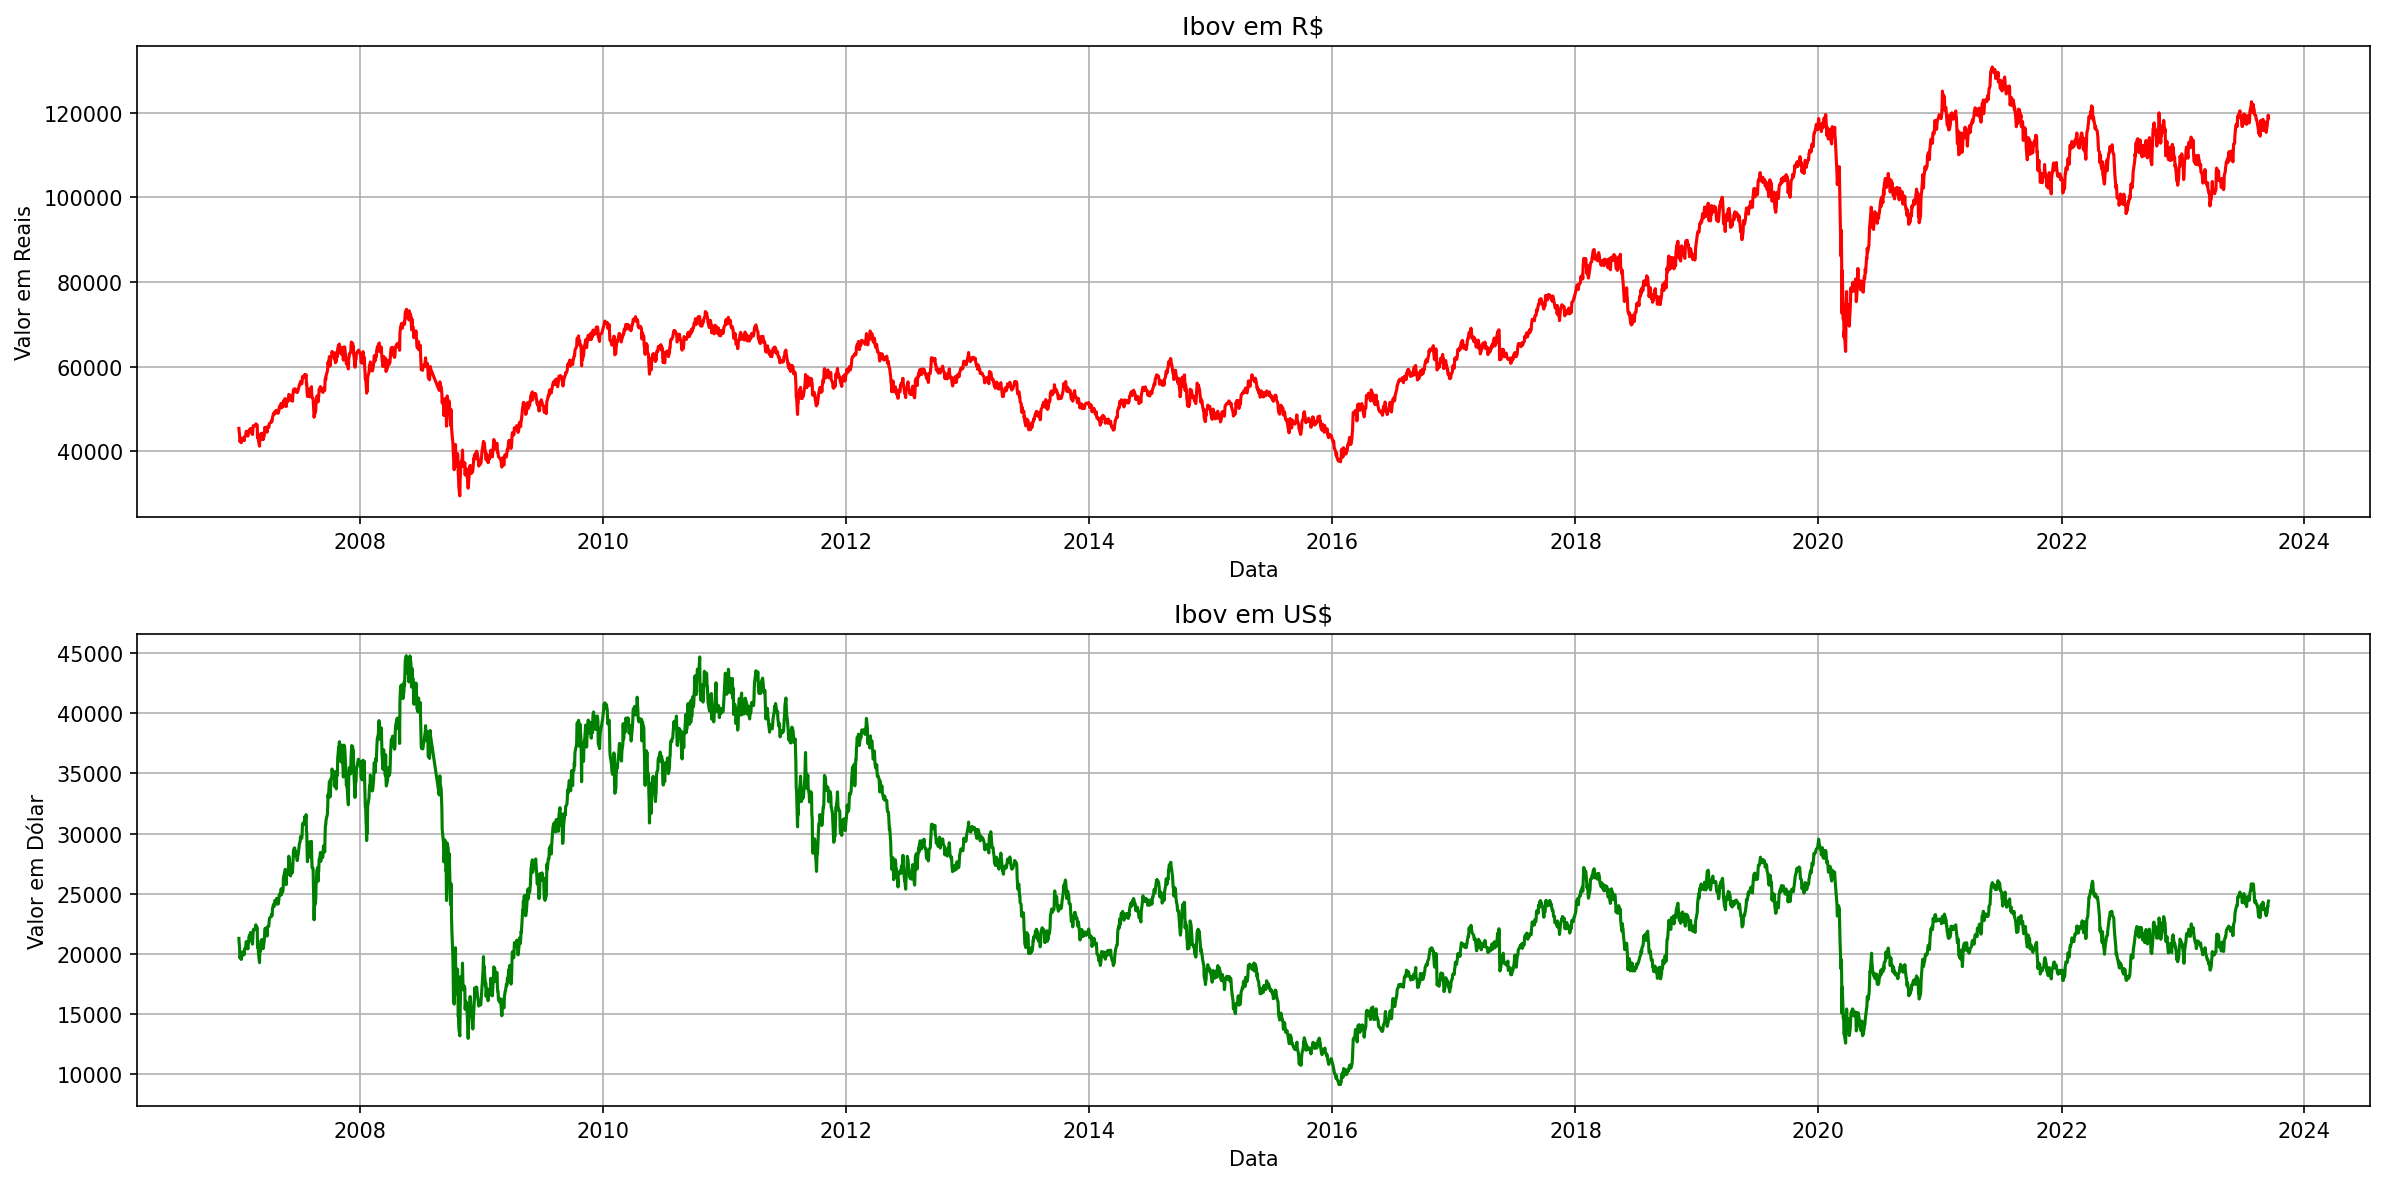

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (16,8), dpi=150) # 2 gráficos um em cima do outro

# Plot do Primeiro Gráfico:
ax1.plot(ibov_dolarizado.index, ibov_dolarizado['IBOV'], label= 'Ibov em R$', color='red')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor em Reais')
ax1.set_title('Ibov em R$')
ax1.grid(True)

# Plot do Segundo Gráfico:
ax2.plot(ibov_dolarizado.index, ibov_dolarizado['IBOV DOLARIZADO'], label= 'Ibov em US$', color='green')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor em Dólar')
ax2.set_title('Ibov em US$')
ax2.grid(True)

# Ajustes do gráfico
plt.tight_layout()

plt.show()
